In [178]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, LogFormatter, MultipleLocator
import matplotlib.dates as mdates

url_confirmed = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
url_deadths = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv'
url_recovereds = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv'

In [177]:
df_confirmed = pd.read_csv(url_confirmed)
df_deadths = pd.read_csv(url_deadths)
df_recovereds_df = pd.read_csv(url_recovereds)

In [179]:
def data_for_country(country):
    data = pd.DataFrame()
    country_confirmed_df = df_confirmed[df_confirmed['Country/Region'] == country]

    country_confirmed_df = country_confirmed_df.drop(['Province/State', 'Lat', 'Long', 'Country/Region'], axis=1)
    country_confirmed_df = country_confirmed_df.T
    country_confirmed_df.index = pd.to_datetime(country_confirmed_df.index)
    country_confirmed_df = pd.DataFrame(country_confirmed_df.sum(axis=1))
    # display(country_confirmed_df)
    #    display(country_confirmed_df.sum(axis=1))
    country_confirmed_df.columns = [country]
    data['Confirmados'] = country_confirmed_df[country]

    country_recovereds_df = df_recovereds_df[df_recovereds_df['Country/Region'] == country]
    country_recovereds_df = country_recovereds_df.drop(['Province/State', 'Lat', 'Long', 'Country/Region'], axis=1)
    country_recovereds_df = country_recovereds_df.T
    country_recovereds_df.index = pd.to_datetime(country_recovereds_df.index)
    country_recovereds_df = pd.DataFrame(country_recovereds_df.sum(axis=1))
    country_recovereds_df.columns = [country]
    data = pd.concat([data, country_recovereds_df[country]], axis=1, sort=False)

    country_deadths_df = df_deadths[df_deadths['Country/Region'] == country]
    country_deadths_df = country_deadths_df.drop(['Province/State', 'Lat', 'Long', 'Country/Region'], axis=1)
    country_deadths_df = country_deadths_df.T
    country_deadths_df.index = pd.to_datetime(country_deadths_df.index)
    country_deadths_df = pd.DataFrame(country_deadths_df.sum(axis=1))
    country_deadths_df.columns = [country]
    data = pd.concat([data, country_deadths_df[country]], axis=1, sort=False)

    data.columns = ['Confirmados', 'Recuperados', 'Muertos']
    data['Infectados'] = data['Confirmados'] - data['Recuperados'] - data['Muertos']
    # display(data.head())

    return data


In [180]:

spain_df = pd.DataFrame()
spain_df = data_for_country('Spain')
italia_df = data_for_country('Italy')
china_df = data_for_country('China')
germany_df = data_for_country('Germany')
francia_df = data_for_country('France')
eeuu_df = data_for_country('US')
uk_df = data_for_country('United Kingdom')

#display(spain_df['Confirmed'].head())
#display(spain_deadths_df.head())
#eeuu_df.tail(20)

In [181]:
def generate_info_text(country_df):
    confirmados= country_df['Confirmados'].iloc[-1]
    recuperados= country_df['Recuperados'].iloc[-1]
    muertes= country_df['Muertos'].iloc[-1]
    infectados= country_df['Infectados'].iloc[-1]
    fecha = country_df.index[-1]
    
    texto = f'Total Confirmados: {confirmados:>6} \n'\
            f'Total Recuperados: {recuperados:>6}\n'\
            f'Total Muertes: {muertes:>6}\n'\
            f'Infectados Actuales: {infectados:>6}\n'\
            f'Actualización: {fecha.strftime("%d %b %Y")}'
    return texto


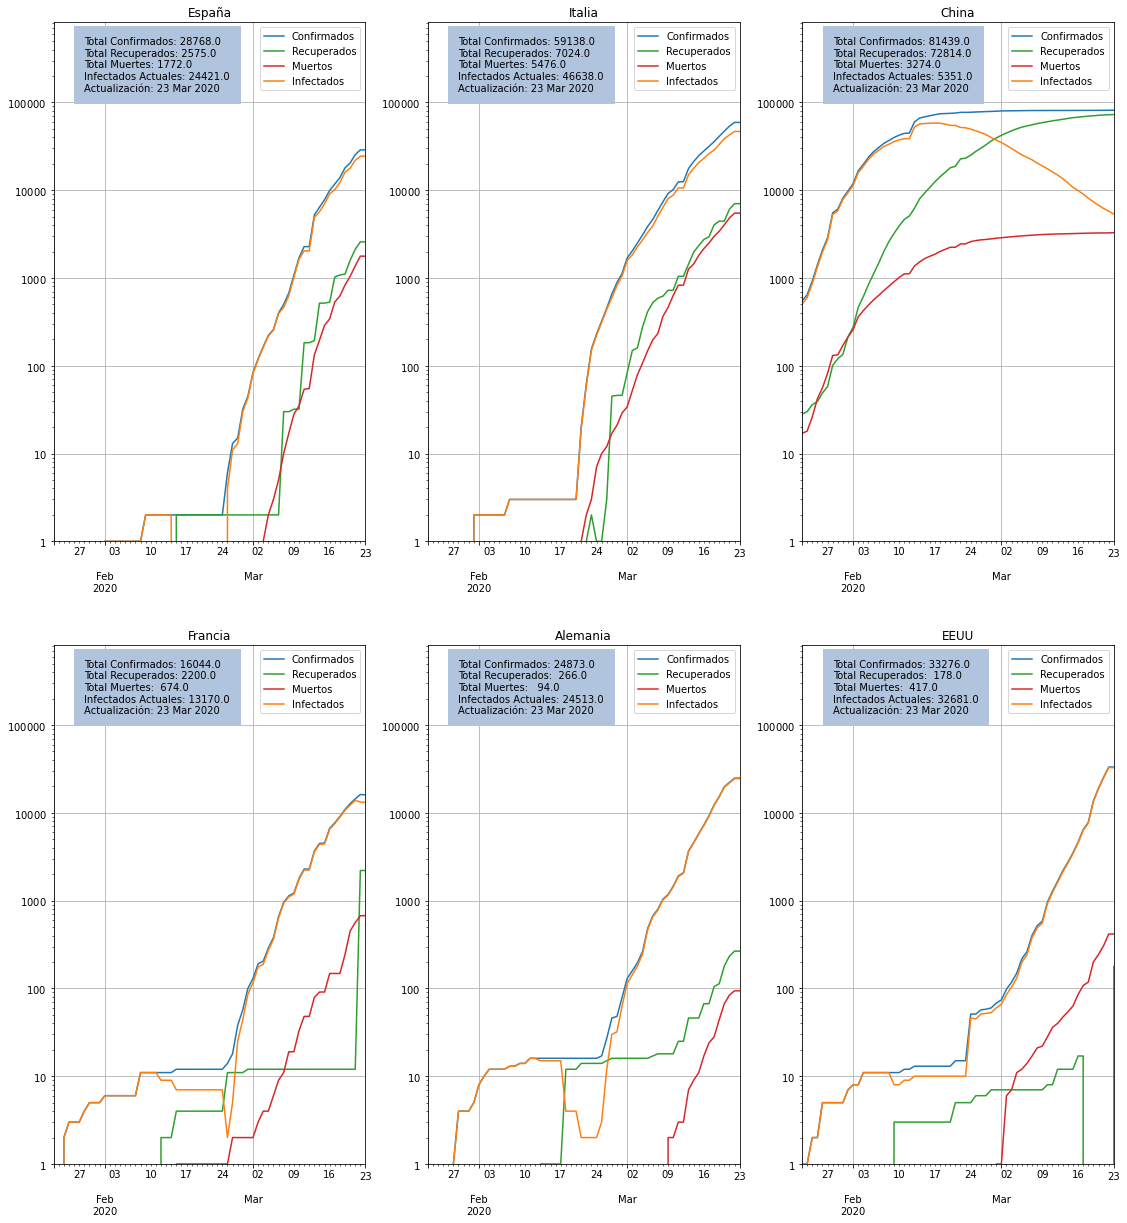

In [182]:
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(19, 21))
#print(axes)
titles = ['España', 'Italia', 'China', 'Francia', 'Alemania', 'EEUU', 'UK']
data = [spain_df, italia_df, china_df, francia_df, germany_df, eeuu_df, uk_df]

max_y = china_df['Confirmados'].max()*10

pais_id = 0
for rox_ax in axes:
    for column_ax in rox_ax:
        data[pais_id].plot(ax=column_ax, color=['#1F77B4','#2CA02C','#D62728','#FF7F0E'])
        column_ax.set_title(titles[pais_id])
        column_ax.set_yscale('log')
        column_ax.set_ylim(1, max_y)
        column_ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
        column_ax.legend()
        column_ax.grid()
        column_ax.text('1/28/2020',max_y/6, generate_info_text(data[pais_id]),
                       bbox=dict(boxstyle="square",
                                 ec='lightsteelblue',
                                 facecolor='lightsteelblue',
                                 pad= 1,
                                ))
        pais_id +=1
    
fig.savefig('test.png')


# Datos por Paises

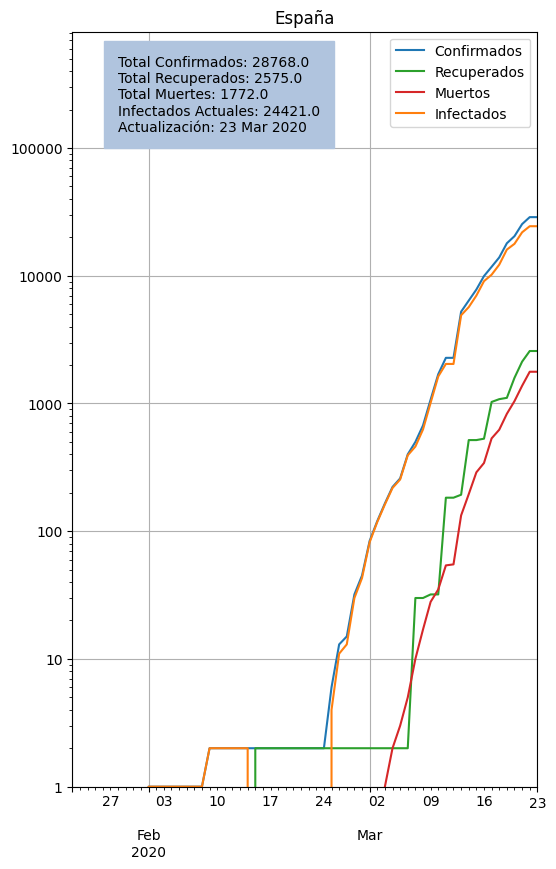

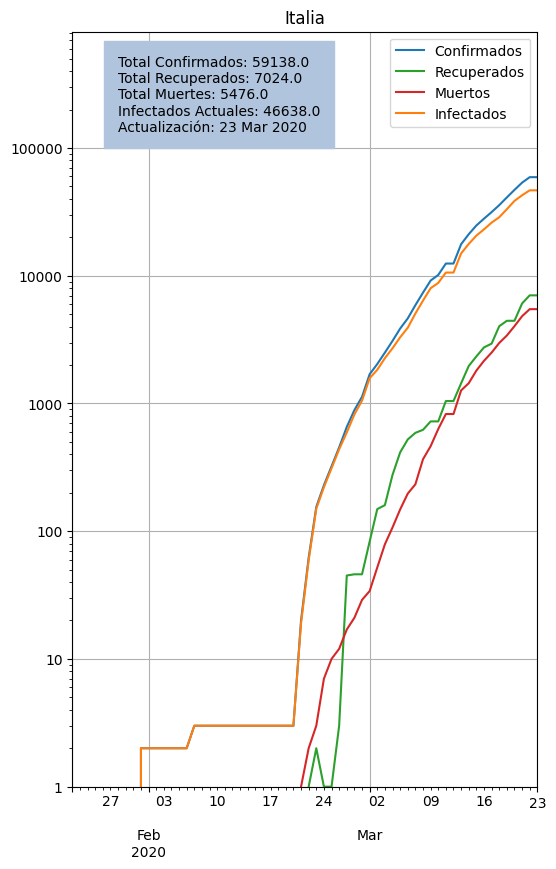

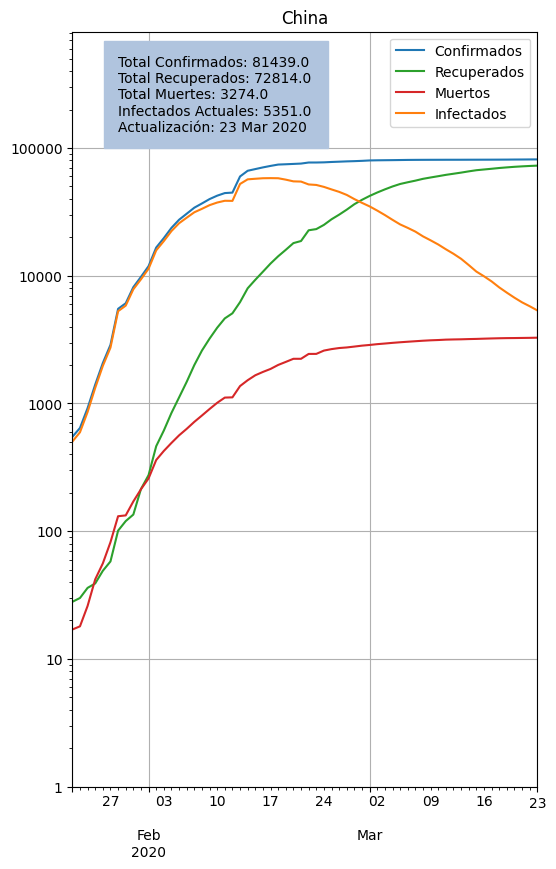

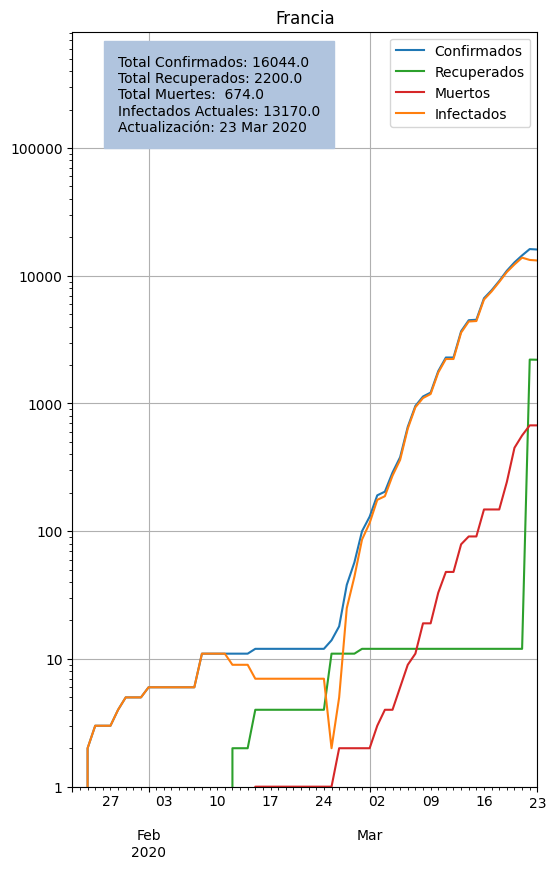

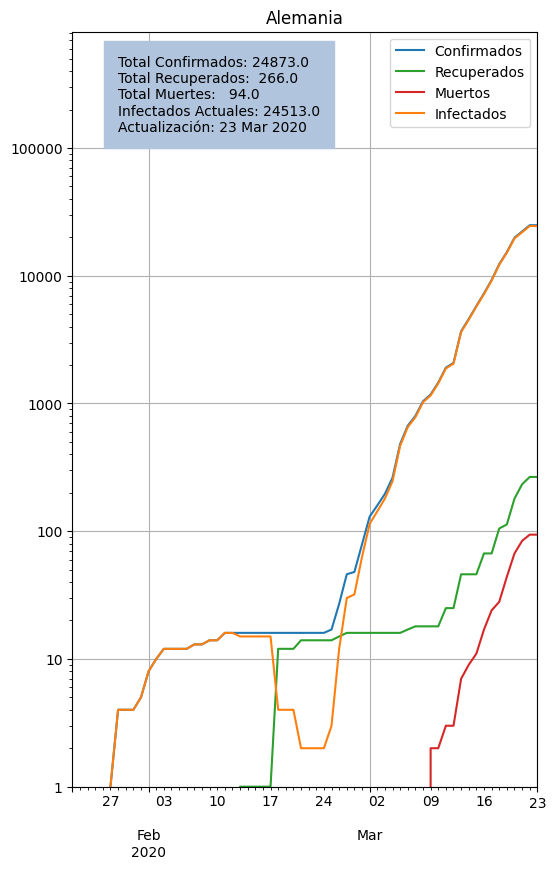

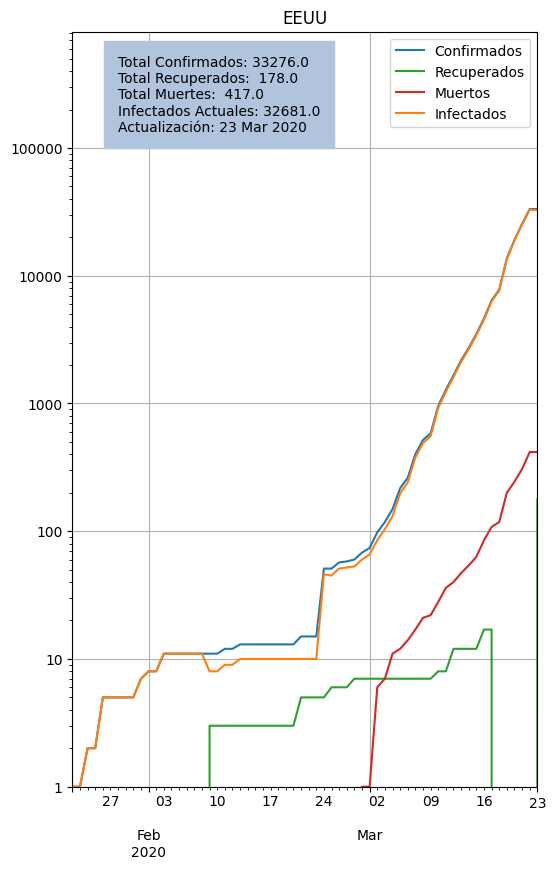

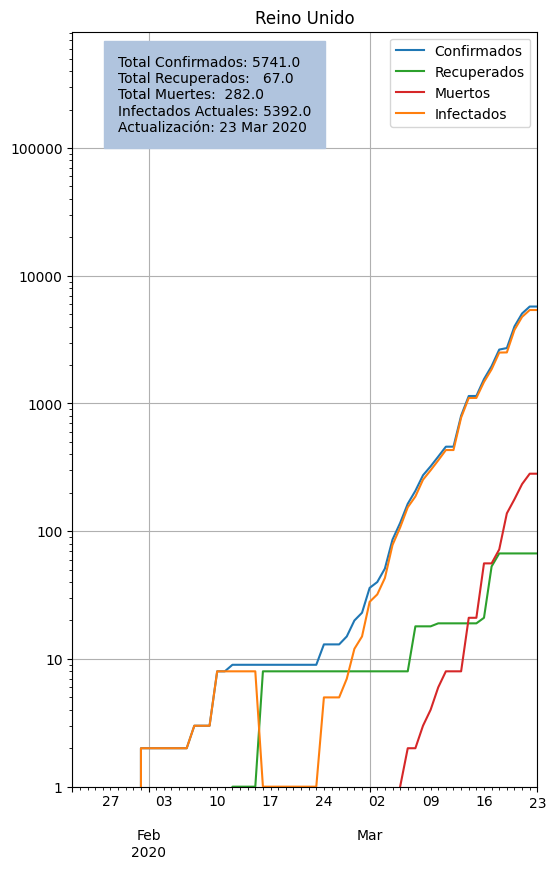

In [183]:

pais_id = 0
for country_df in data:
    fig = plt.figure(figsize=(6,10), dpi=100)
    ax = fig.add_subplot(1, 1, 1)
    country_df.plot(ax=ax, color=['#1F77B4','#2CA02C','#D62728','#FF7F0E'])
    if (titles[pais_id]=="UK"):
        title = 'Reino Unido'
    else:
        title = titles[pais_id]
            

    ax.set_title(title)
    ax.set_yscale('log')
    ax.set_ylim(1, max_y)
    ax.yaxis.set_major_formatter(ScalarFormatter())
    ax.legend(loc='best')
    ax.grid()    
    ax.text('1/28/2020',max_y/6, generate_info_text(country_df),          
            bbox=dict(boxstyle="square",
                   ec='lightsteelblue',
                   facecolor='lightsteelblue',
                   pad= 1,
                   ))
    
    
    fig.savefig(f'{titles[pais_id]}-test.png')
    pais_id +=1

# Comparativas


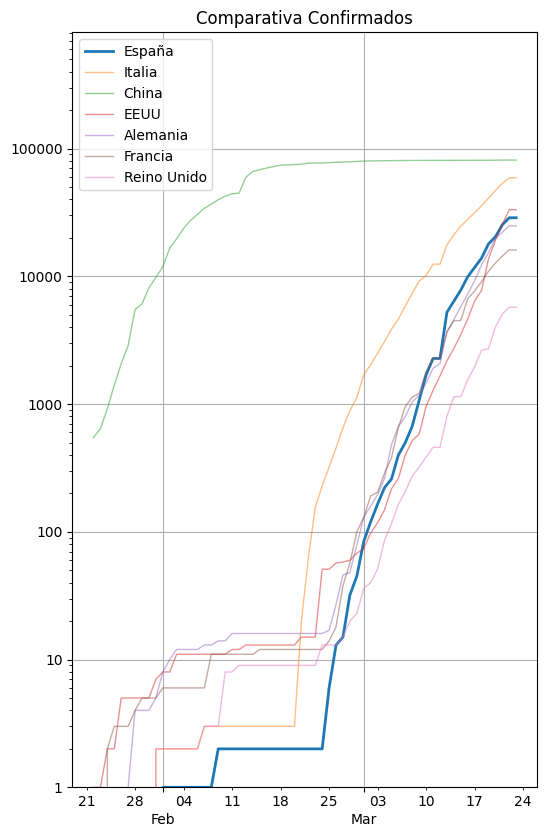

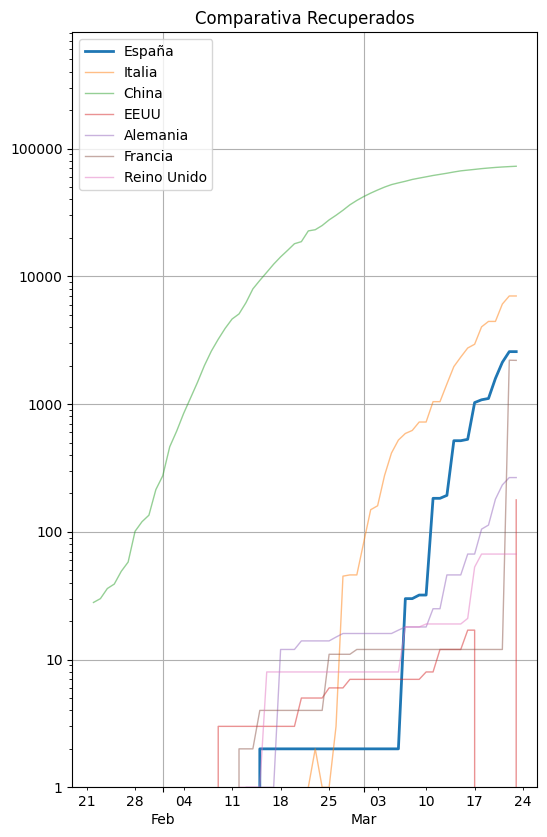

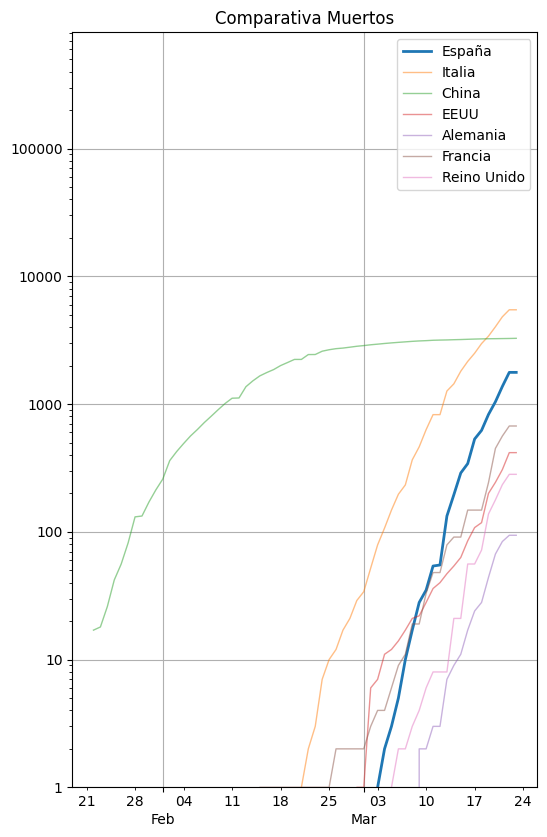

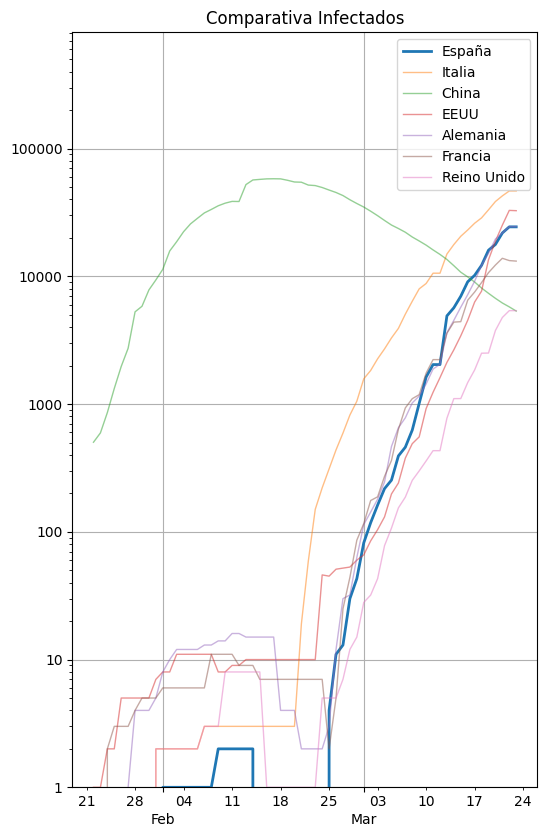

In [184]:
estados =['Confirmados', 'Recuperados', 'Muertos', 'Infectados']
for estado in estados:
    fig = plt.figure(figsize=(6,10), dpi=100)
    ax = fig.add_subplot(1, 1, 1)
    
    ax.plot(spain_df[estado], label='España',linewidth=2)
    ax.plot(italia_df[estado], label='Italia',linewidth=1, alpha = 0.5)
    ax.plot(china_df[estado], label='China',linewidth=1, alpha = 0.5)
    ax.plot(eeuu_df[estado], label='EEUU',linewidth=1, alpha = 0.5)
    ax.plot(germany_df[estado], label='Alemania',linewidth=1, alpha = 0.5)
    ax.plot(francia_df[estado], label='Francia',linewidth=1, alpha = 0.5)
    ax.plot(uk_df[estado], label='Reino Unido',linewidth=1, alpha = 0.5)
    
    ax.set_title(f'Comparativa {estado}')
    ax.set_yscale('log')
    ax.set_ylim(1, max_y)
    ax.yaxis.set_major_formatter(ScalarFormatter())
    ax.xaxis.set_major_formatter(ScalarFormatter())

    #set major ticks format
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    
    ax.xaxis.set_minor_formatter(mdates.DateFormatter('%d'))
    ax.xaxis.set_minor_locator(mdates.WeekdayLocator())
    xax = ax.get_xaxis()
    xax.set_tick_params(which='major', pad=15)
    
    
    ax.legend(loc='best')
    ax.grid()    
    
#    fig.savefig(f'{titles[pais_id]}-test.png')